In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("All libraries loaded successfully!")




All libraries loaded successfully!


In [6]:
import pandas as pd

# بارگذاری دیتاست
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

# نمایش 5 سطر اول
df.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [7]:
# اطلاعات کلی دیتاست
df.info()

# بررسی وجود مقادیر خالی
df.isnull().sum()

# نمایش چند سطر تصادفی
df.sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
5532,NaN,283.03,0.0,0.0,40,Clouds,scattered clouds,2013-04-26 17:00:00,6174
17228,NaN,293.77,0.0,0.0,75,Rain,light rain,2015-08-09 04:00:00,360
232,NaN,282.20,0.0,0.0,75,Clouds,broken clouds,2012-10-12 16:00:00,6057
23337,NaN,276.57,0.0,0.0,90,Clouds,overcast clouds,2016-05-14 02:00:00,822
46568,NaN,295.34,0.0,0.0,5,Clear,sky is clear,2018-08-09 09:00:00,4788


In [8]:
# نمایش اطلاعات کلی
df.info()

# تعداد مقادیر خالی در هر ستون
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64

In [9]:
# حذف ردیف‌هایی که مقادیر خالی دارند
df = df.dropna()


In [10]:
X = df[['traffic_volume']]


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


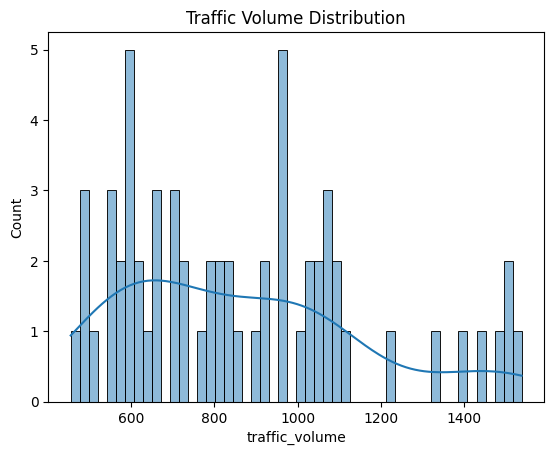

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['traffic_volume'], bins=50, kde=True)
plt.title("Traffic Volume Distribution")
plt.show()


In [13]:
from sklearn.ensemble import IsolationForest

# مدل Isolation Forest
model = IsolationForest(contamination=0.01, random_state=42)  # 1% داده به عنوان ناهنجار
model.fit(X_scaled)

# پیش‌بینی ناهنجاری‌ها
df['anomaly'] = model.predict(X_scaled)

# تبدیل خروجی: -1 = anomaly، 1 = normal → 1 = anomaly، 0 = normal
df['anomaly'] = df['anomaly'].map({1:0, -1:1})

# نمایش چند نمونه ناهنجار
df[df['anomaly']==1].head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,anomaly
34095,Memorial Day,285.87,0.0,0.0,40,Clouds,scattered clouds,2017-05-29 00:00:00,1538,1


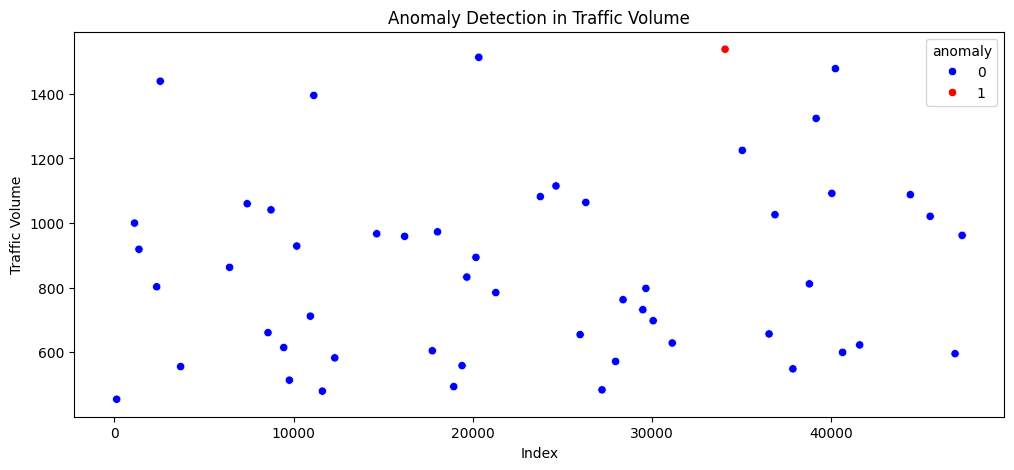

In [14]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df, x=df.index, y='traffic_volume', hue='anomaly', palette={0:'blue', 1:'red'})
plt.title("Anomaly Detection in Traffic Volume")
plt.xlabel("Index")
plt.ylabel("Traffic Volume")
plt.show()


In [15]:
num_anomalies = df['anomaly'].sum()
total = len(df)
print(f"تعداد ناهنجاری‌ها: {num_anomalies} از {total} ردیف ({num_anomalies/total*100:.2f}%)")


تعداد ناهنجاری‌ها: 1 از 61 ردیف (1.64%)


In [16]:
df[df['anomaly']==1].head(10)



,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,anomaly
34095,Memorial Day,285.87,0.0,0.0,40,Clouds,scattered clouds,2017-05-29 00:00:00,1538,1


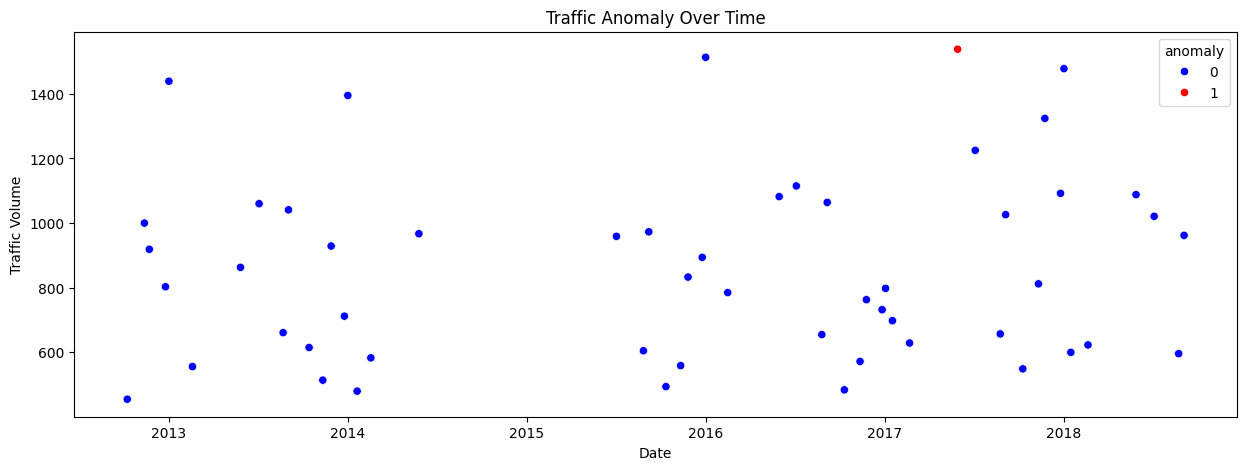

In [17]:
# مطمئن شو ستون datetime تبدیل شده
df['date_time'] = pd.to_datetime(df['date_time'])

plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x='date_time', y='traffic_volume', hue='anomaly', palette={0:'blue', 1:'red'})
plt.title("Traffic Anomaly Over Time")
plt.xlabel("Date")
plt.ylabel("Traffic Volume")
plt.show()


In [18]:
df.to_csv("traffic_with_anomalies.csv", index=False)
